<a href="https://colab.research.google.com/github/rozario-lamperouge/DeepLearningCourse/blob/main/CNN_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install tensorflow==2.15.0

#**Convolutional Neural Networks**

In [25]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Loading the Dataset

In [26]:
# load the dataset
mnist = tf.keras.datasets.fashion_mnist

# split it into training and testing data
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

# reshape the data
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# normalize between 0 and 1
X_train , X_test = X_train/255.0 , X_test/255.0

## Visualizing the Data

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

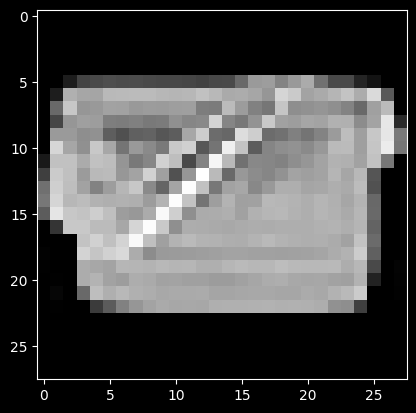

In [27]:
i = 2679

np.set_printoptions(linewidth=200)
print(X_train[i])
print(Y_train[i])

plt.imshow(X_train[i], cmap='gray')
print(Y_train[i])

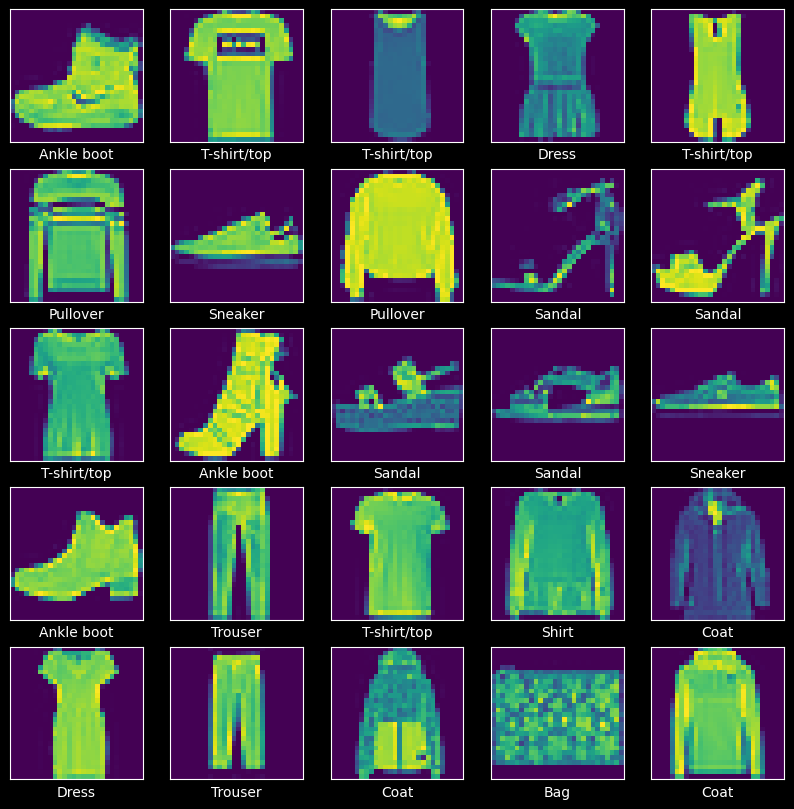

In [28]:
# defining class names manually since all the class names will be stored 0 to 10 in the output class
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# plot the first 25 images along with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i]])

plt.show()

## Defining the Model


In [29]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
Total params: 37568 (146.75 KB)
Trainable params: 37568 (146.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

model.fit(X_train,Y_train,epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(Y_test[:100])

313/313 [==============================] - 4s 11ms/step - loss: 0.3157 - acc: 0.9116
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


# Visualizing the Convolutions & Pooling

1/1 [==============================] - 0s 20ms/step
9
6
6


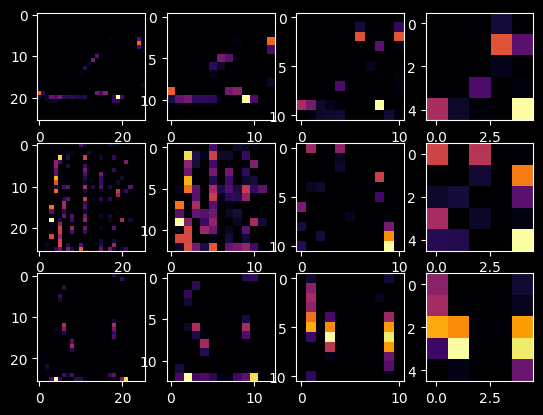

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

fg, axs = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26

CONVOLUTION_NUMBER = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axs[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axs[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axs[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[2,x].grid(False)

print(Y_test[FIRST_IMAGE])
print(Y_test[SECOND_IMAGE])
print(Y_test[THIRD_IMAGE])